In [46]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Example formatting in HTML - This is a big headline!</h1>
<h2>Edit this cell to see them - This is a smaller headline<h2>
<hr>
<b>Things can be bold....</b>

<i>Or italic</i>
<ul>
<li>Things can be in a list
<li>all sorts of things!
</ul>

<ol>
<li>Lists can have numbers
<li>they count automatically!
</ol>



<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

In [47]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Note: you'll have to look at the units to ensure you get it right. 

In [48]:
##
#Calculating GDP per capita
gdpPerCap = dfLE.GDP / dfLE.Population

#Creating a colum for GDP per Capita
dfLE["GDPPerCap"] = gdpPerCap

#Taking a look at our updated data frame to see the GDP Per Capita column
dfLE.head()

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPPerCap
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250,0.000034
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750,0.003042
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250,0.000132
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375,0.000195
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375,NaN


<h2>Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)</h2>
Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options
<li>5 points are for doing it in an efficient way - just listing off each column is lots of typing...
</ul>

<b>Visualizing distribution for LIFE EXPECTANCY using CDF & PDF</b>

0.026340012265368185


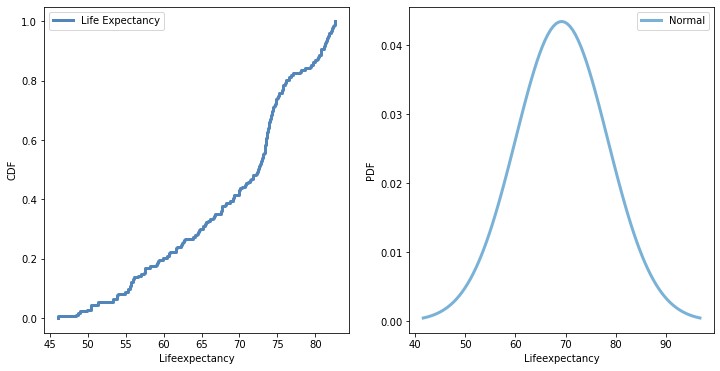

In [49]:
##
# making the CDF object
cdfLE = thinkstats2.Cdf(dfLE["Lifeexpectancy"])

#defining the child class to be used for the normal pdf plot
meanLE =dfLE.Lifeexpectancy.mean()
varLE = dfLE.Lifeexpectancy.var()
stdLE = math.sqrt(varLE)
pdfLE = thinkstats2.NormalPdf(meanLE, stdLE)
print(pdfLE.Density(meanLE + stdLE))

# Ploting the distribution
thinkplot.PrePlot(2, rows =1, cols=2)
thinkplot.Cdf(cdfLE, label = "Life Expectancy")
thinkplot.Config(xlabel="Lifeexpectancy", ylabel='CDF')
thinkplot.subplot(2)
thinkplot.Pdf(pdfLE, label="Normal")
thinkplot.Config(xlabel="Lifeexpectancy", ylabel='PDF')



<b>Visualizing distribution for ALDULT MORTALITY using CDF & PDF</b>

0.002515676297780678


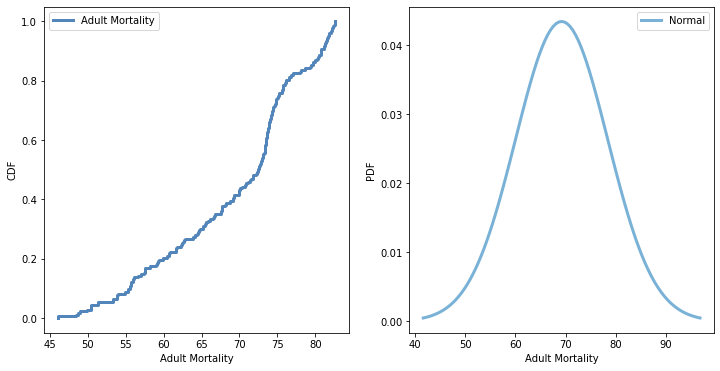

In [50]:
##
# making the CDF object
cdfAM = thinkstats2.Cdf(dfLE["AdultMortality"])

#defining the child class to be used for the normal pdf plot
meanAM =dfLE.AdultMortality.mean()
varAM = dfLE.AdultMortality.var()
stdAM = math.sqrt(varAM)
pdfAM = thinkstats2.NormalPdf(meanAM, stdAM)
print(pdfAM.Density(meanAM + stdAM))

# Ploting the distribution
thinkplot.PrePlot(2, rows =1, cols=2)
thinkplot.Cdf(cdfLE, label = "Adult Mortality")
thinkplot.Config(xlabel="Adult Mortality", ylabel='CDF')
thinkplot.subplot(2)
thinkplot.Pdf(pdfLE, label="Normal")
thinkplot.Config(xlabel="Adult Mortality", ylabel='PDF')

<b>Visualizing distribution for INFANT DEATHS using CDF & PDF</b>

0.002128307766080339


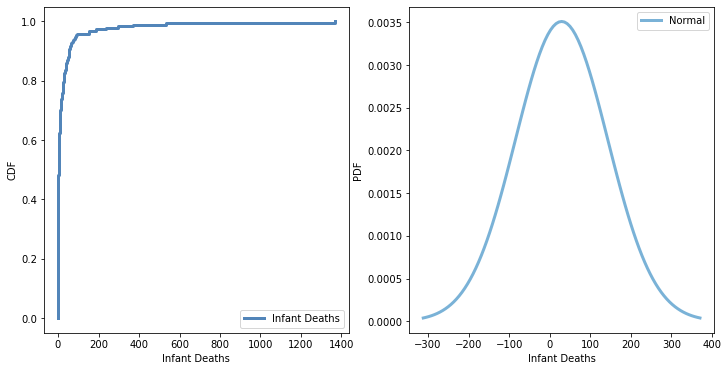

In [51]:
##
# making the CDF object
cdfID = thinkstats2.Cdf(dfLE["infantdeaths"])

#defining the child class to be used for the normal pdf plot
meanID =dfLE.infantdeaths.mean()
varID = dfLE.infantdeaths.var()
stdID = math.sqrt(varID)
pdfID = thinkstats2.NormalPdf(meanID, stdID)
print(pdfID.Density(meanID + stdID))

# Ploting the distribution
thinkplot.PrePlot(2, rows =1, cols=2)
thinkplot.Cdf(cdfID, label = "Infant Deaths")
thinkplot.Config(xlabel="Infant Deaths", ylabel='CDF')
thinkplot.subplot(2)
thinkplot.Pdf(pdfID, label="Normal")
thinkplot.Config(xlabel="Infant Deaths", ylabel='PDF')

<b>Visualizing distribution for ALCOHOL using CDF & PDF</b>

0.06247431578488085


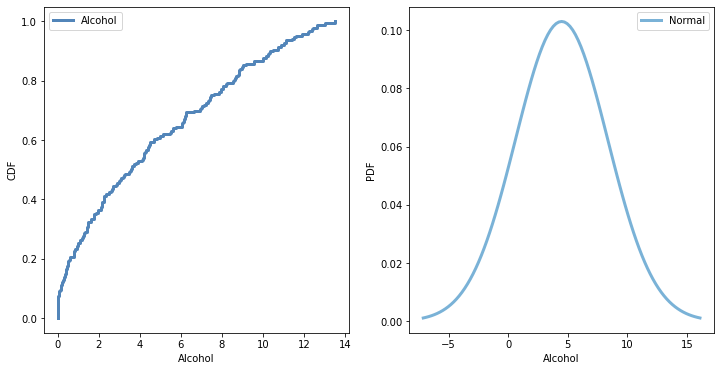

In [52]:
##
# making the CDF object
cdfACH = thinkstats2.Cdf(dfLE["Alcohol"])

#defining the child class to be used for the normal pdf plot
meanACH =dfLE.Alcohol.mean()
varACH = dfLE.Alcohol.var()
stdACH = math.sqrt(varACH)
pdfACH = thinkstats2.NormalPdf(meanACH, stdACH)
print(pdfACH.Density(meanACH + stdACH))

# Ploting the distribution
thinkplot.PrePlot(2, rows =1, cols=2)
thinkplot.Cdf(cdfACH, label = "Alcohol")
thinkplot.Config(xlabel="Alcohol", ylabel='CDF')
thinkplot.subplot(2)
thinkplot.Pdf(pdfACH, label="Normal")
thinkplot.Config(xlabel="Alcohol", ylabel='PDF')

<b>Visualizing distribution for HEPATITISB using CDF & PDF</b>

0.013892234493980287


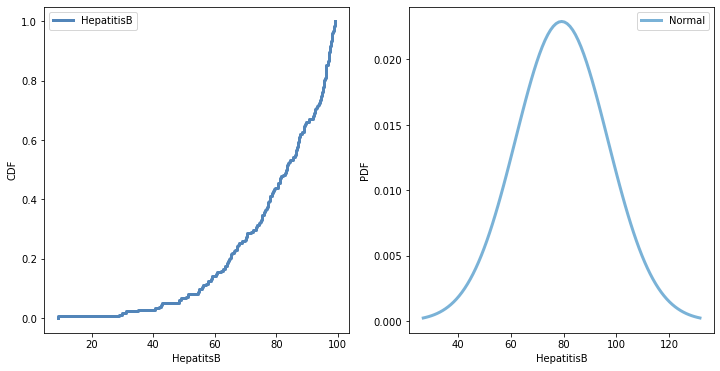

In [53]:
##
# making the CDF object
cdfHPT = thinkstats2.Cdf(dfLE["HepatitisB"])

#defining the child class to be used for the normal pdf plot
meanHPT =dfLE.HepatitisB.mean()
varHPT = dfLE.HepatitisB.var()
stdHPT = math.sqrt(varHPT)
pdfHPT = thinkstats2.NormalPdf(meanHPT, stdHPT)
print(pdfHPT.Density(meanHPT + stdHPT))

# Ploting the distribution
thinkplot.PrePlot(2, rows =1, cols=2)
thinkplot.Cdf(cdfHPT, label = "HepatitisB")
thinkplot.Config(xlabel="HepatitsB", ylabel='CDF')
thinkplot.subplot(2)
thinkplot.Pdf(pdfHPT, label="Normal")
thinkplot.Config(xlabel="HepatitisB", ylabel='PDF')

<b>Visualizing distribution for MEASLES using CDF & PDF</b>

3.053624358377374e-05


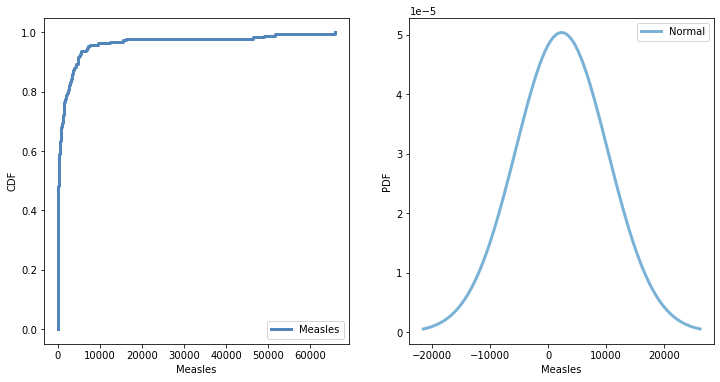

In [54]:
##
# making the CDF object
cdfMS = thinkstats2.Cdf(dfLE["Measles"])

#defining the child class to be used for the normal pdf plot
meanMS =dfLE.Measles.mean()
varMS = dfLE.Measles.var()
stdMS = math.sqrt(varMS)
pdfMS = thinkstats2.NormalPdf(meanMS, stdMS)
print(pdfMS.Density(meanMS + stdMS))

# Ploting the distribution
thinkplot.PrePlot(2, rows =1, cols=2)
thinkplot.Cdf(cdfMS, label = "Measles")
thinkplot.Config(xlabel="Measles", ylabel='CDF')
thinkplot.subplot(2)
thinkplot.Pdf(pdfMS, label="Normal")
thinkplot.Config(xlabel="Measles", ylabel='PDF')

<b>Visualizing distribution for BMI using CDF & PDF</b>

0.014088108877035705


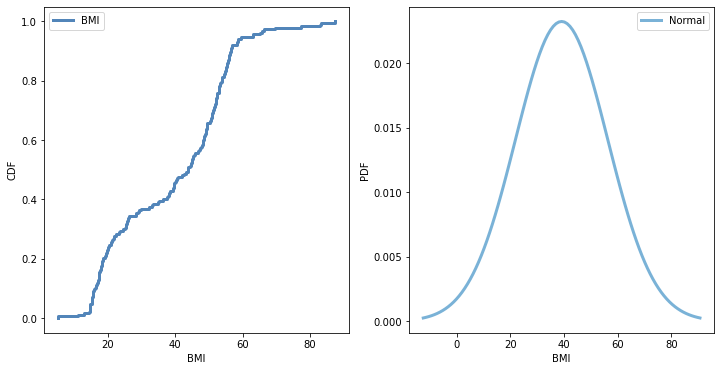

In [55]:
##
# making the CDF object
cdfBMI = thinkstats2.Cdf(dfLE["BMI"])

#defining the child class to be used for the normal pdf plot
meanBMI =dfLE.BMI.mean()
varBMI = dfLE.BMI.var()
stdBMI = math.sqrt(varBMI)
pdfBMI = thinkstats2.NormalPdf(meanBMI, stdBMI)
print(pdfBMI.Density(meanBMI + stdBMI))

# Ploting the distribution
thinkplot.PrePlot(2, rows =1, cols=2)
thinkplot.Cdf(cdfBMI, label = "BMI")
thinkplot.Config(xlabel="BMI", ylabel='CDF')
thinkplot.subplot(2)
thinkplot.Pdf(pdfBMI, label="Normal")
thinkplot.Config(xlabel="BMI", ylabel='PDF')

<b>Visualizing distribution for UNDER-FIVE DEATHS using CDF & PDF</b>

0.001568074903259506


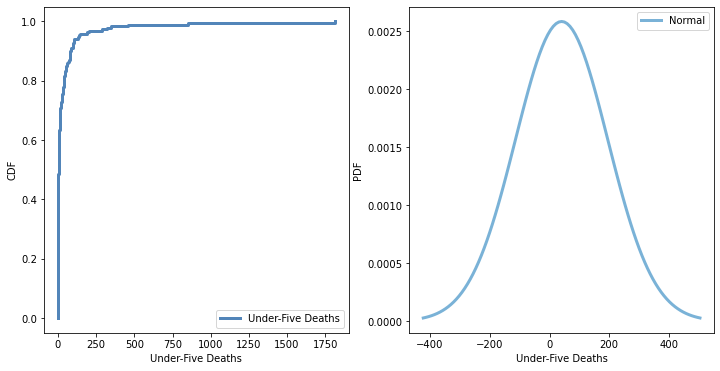

In [56]:
##
# making the CDF object
cdfUFD = thinkstats2.Cdf(dfLE["under-fivedeaths"])

#defining the child class to be used for the normal pdf plot
meanUFD =dfLE["under-fivedeaths"].mean()
varUFD = dfLE["under-fivedeaths"].var()
stdUFD = math.sqrt(varUFD)
pdfUFD = thinkstats2.NormalPdf(meanUFD, stdUFD)
print(pdfUFD.Density(meanUFD + stdUFD))

# Ploting the distribution
thinkplot.PrePlot(2, rows =1, cols=2)
thinkplot.Cdf(cdfUFD, label = "Under-Five Deaths")
thinkplot.Config(xlabel="Under-Five Deaths", ylabel='CDF')
thinkplot.subplot(2)
thinkplot.Pdf(pdfUFD, label="Normal")
thinkplot.Config(xlabel="Under-Five Deaths", ylabel='PDF')

<b>Visualizing distribution for POLIO using CDF & PDF</b>

0.015194078922423047


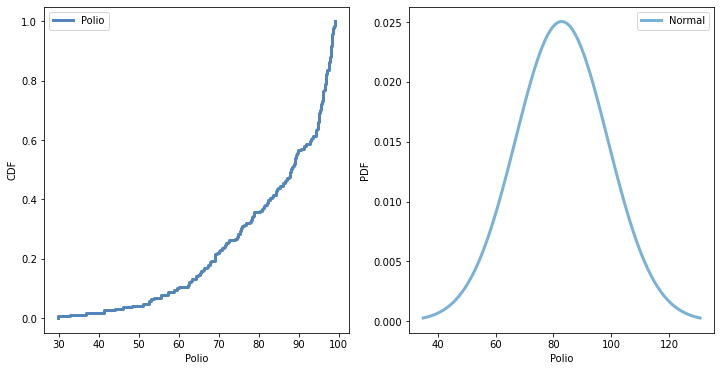

In [57]:
##
# making the CDF object
cdfPL = thinkstats2.Cdf(dfLE["Polio"])

#defining the child class to be used for the normal pdf plot
meanPL =dfLE.Polio.mean()
varPL = dfLE.Polio.var()
stdPL = math.sqrt(varPL)
pdfPL = thinkstats2.NormalPdf(meanPL, stdPL)
print(pdfPL.Density(meanPL + stdPL))

# Ploting the distribution
thinkplot.PrePlot(2, rows =1, cols=2)
thinkplot.Cdf(cdfPL, label = "Polio")
thinkplot.Config(xlabel="Polio", ylabel='CDF')
thinkplot.subplot(2)
thinkplot.Pdf(pdfPL, label="Normal")
thinkplot.Config(xlabel="Polio", ylabel='PDF')

<b>Visualizing distribution for DIPHTHERIA using CDF & PDF</b>

0.014724442328660088


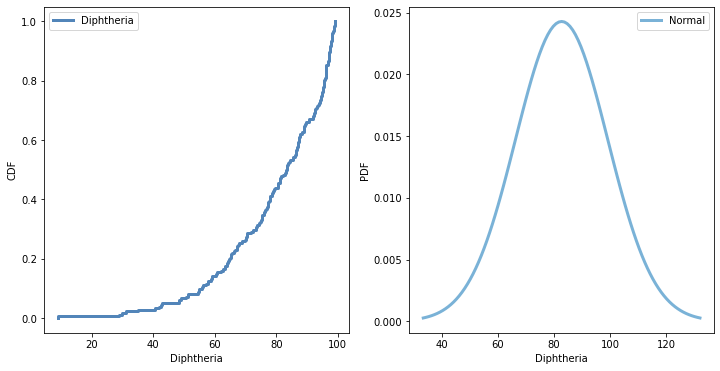

In [58]:
##
# making the CDF object
cdfDTA = thinkstats2.Cdf(dfLE["HepatitisB"])

#defining the child class to be used for the normal pdf plot
meanDTA =dfLE.Diphtheria.mean()
varDTA = dfLE.Diphtheria.var()
stdDTA = math.sqrt(varDTA)
pdfDTA = thinkstats2.NormalPdf(meanDTA, stdDTA)
print(pdfDTA.Density(meanDTA + stdDTA))

# Ploting the distribution
thinkplot.PrePlot(2, rows =1, cols=2)
thinkplot.Cdf(cdfDTA, label = "Diphtheria")
thinkplot.Config(xlabel="Diphtheria", ylabel='CDF')
thinkplot.subplot(2)
thinkplot.Pdf(pdfDTA, label="Normal")
thinkplot.Config(xlabel="Diphtheria", ylabel='PDF')

<b>Visualizing distribution for GDP using CDF & PDF</b>

0.013892234493980287


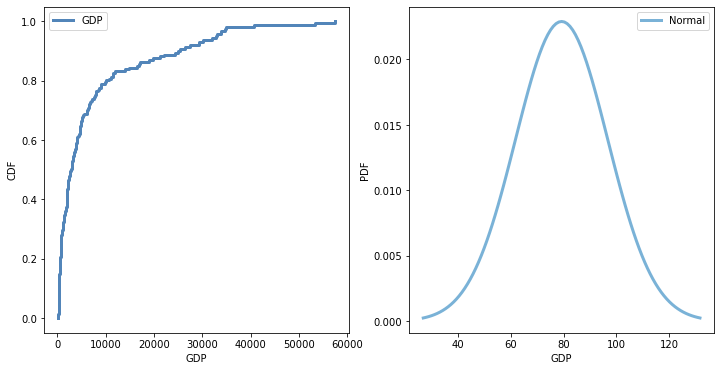

In [59]:
##
# making the CDF object
cdfGDP = thinkstats2.Cdf(dfLE["GDP"])

#defining the child class to be used for the normal pdf plot
meanGDP =dfLE.HepatitisB.mean()
varGDP = dfLE.HepatitisB.var()
stdGDP = math.sqrt(varGDP)
pdfGDP = thinkstats2.NormalPdf(meanGDP, stdGDP)
print(pdfGDP.Density(meanGDP + stdGDP))

# Ploting the distribution
thinkplot.PrePlot(2, rows =1, cols=2)
thinkplot.Cdf(cdfGDP, label = "GDP")
thinkplot.Config(xlabel="GDP", ylabel='CDF')
thinkplot.subplot(2)
thinkplot.Pdf(pdfGDP, label="Normal")
thinkplot.Config(xlabel="GDP", ylabel='PDF')

<b>Visualizing distribution for POPULATION using CDF & PDF</b>

6.321138793996183e-09


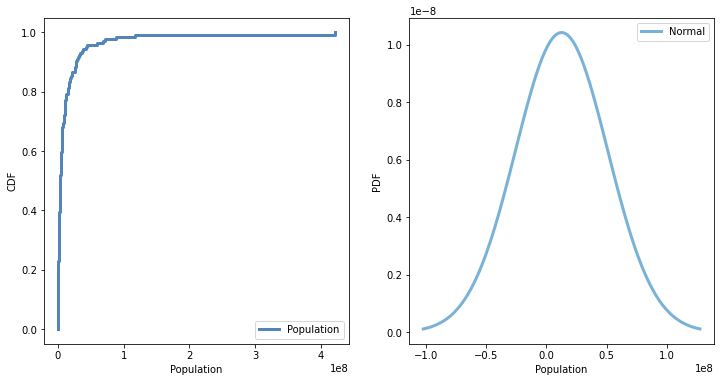

In [60]:
##
# making the CDF object
cdfPPL = thinkstats2.Cdf(dfLE["Population"])

#defining the child class to be used for the normal pdf plot
meanPPL =dfLE.Population.mean()
varPPL = dfLE.Population.var()
stdPPL = math.sqrt(varPPL)
pdfPPL = thinkstats2.NormalPdf(meanPPL, stdPPL)
print(pdfPPL.Density(meanPPL + stdPPL))

# Ploting the distribution
thinkplot.PrePlot(2, rows =1, cols=2)
thinkplot.Cdf(cdfPPL, label = "Population")
thinkplot.Config(xlabel="Population", ylabel='CDF')
thinkplot.subplot(2)
thinkplot.Pdf(pdfPPL, label="Normal")
thinkplot.Config(xlabel="Population", ylabel='PDF')

<b>Visualizing distribution for SCHOOLING using CDF & PDF</b>

0.02254339181790345


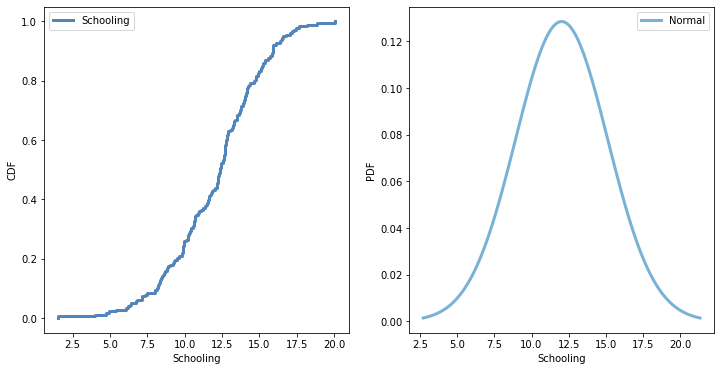

In [61]:
##
# making the CDF object
cdfSCH = thinkstats2.Cdf(dfLE["Schooling"])

#defining the child class to be used for the normal pdf plot
meanSCH =dfLE.Schooling.mean()
varSCH = dfLE.Schooling.var()
stdSCH = math.sqrt(varSCH)
pdfSCH = thinkstats2.NormalPdf(meanSCH, stdSCH)
print(pdfHPT.Density(meanHPT + stdSCH))

# Ploting the distribution
thinkplot.PrePlot(2, rows =1, cols=2)
thinkplot.Cdf(cdfSCH, label = "Schooling")
thinkplot.Config(xlabel="Schooling", ylabel='CDF')
thinkplot.subplot(2)
thinkplot.Pdf(pdfSCH, label="Normal")
thinkplot.Config(xlabel="Schooling", ylabel='PDF')

<b>Visualizing distribution for GDP PER CAPITA using CDF & PDF</b>

6.38194472158164e-210


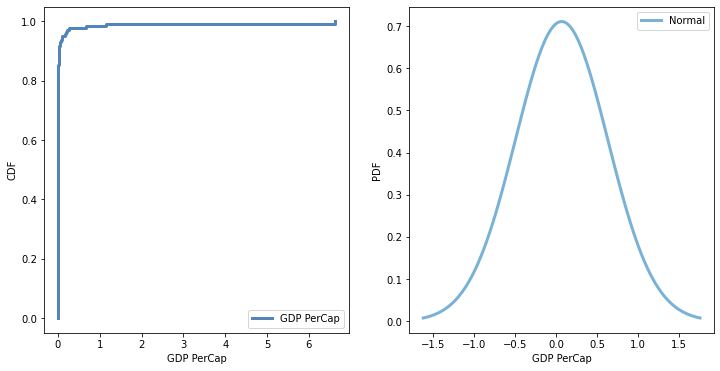

In [62]:
##
# making the CDF object
cdfGPC = thinkstats2.Cdf(dfLE["GDPPerCap"])

#defining the child class to be used for the normal pdf plot
meanGPC =dfLE.GDPPerCap.mean()
varGPC = dfLE.GDPPerCap.var()
stdGPC = math.sqrt(varGPC)
pdfGPC = thinkstats2.NormalPdf(meanGPC, stdGPC)
print(pdfGPC.Density(meanGPC + stdHPT))

# Ploting the distribution
thinkplot.PrePlot(2, rows =1, cols=2)
thinkplot.Cdf(cdfGPC, label = "GDP PerCap")
thinkplot.Config(xlabel="GDP PerCap", ylabel='CDF')
thinkplot.subplot(2)
thinkplot.Pdf(pdfGPC, label="Normal")
thinkplot.Config(xlabel="GDP PerCap", ylabel='PDF')

<h2>Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)</h2>
<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it without using a fit() method. Plot the emperical data on the same graph. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 

<b>My chosen Analytical distribution is the KERNEL DENSITY ESTIMATED PDF.</b>

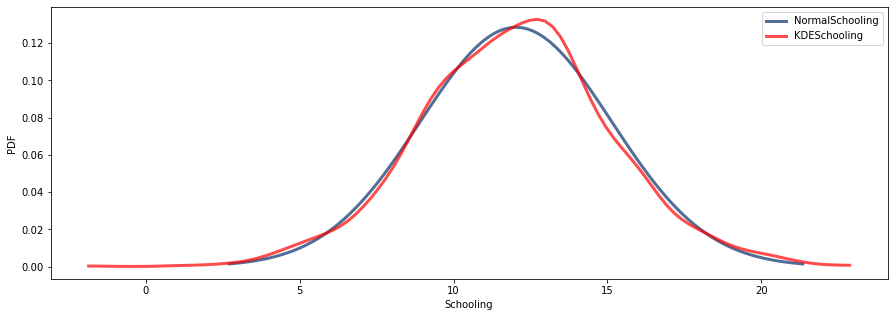

In [63]:
##
# #Normal PDF plot for Schooling distribution.
thinkplot.Pdf(pdfSCH, label="NormalSchooling")
thinkplot.Config(xlabel="Schooling", ylabel='PDF', color ="blue")

#Kernel density Estimate plot
#using the mean and std from the normal plot, - Generate random numbers for KDE plot
import random
kdeSchooling = [random.gauss(meanSCH, stdSCH) for i in range(2000)]
kdeSchooling_pdf = thinkstats2.EstimatedPdf(kdeSchooling)
thinkplot.Pdf(kdeSchooling_pdf, label="KDESchooling", color = "red")
thinkplot.Config()

<b>Predicting the percentage that have a schooling level within 1 year of Canada.</b>

<h2>Part 3: Create another analytical distribution for GDP per Capita (20pts)</h2>
<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 

<b>My chosen Analytical distribution is the KERNEL DENSITY ESTIMATED PDF.</b>

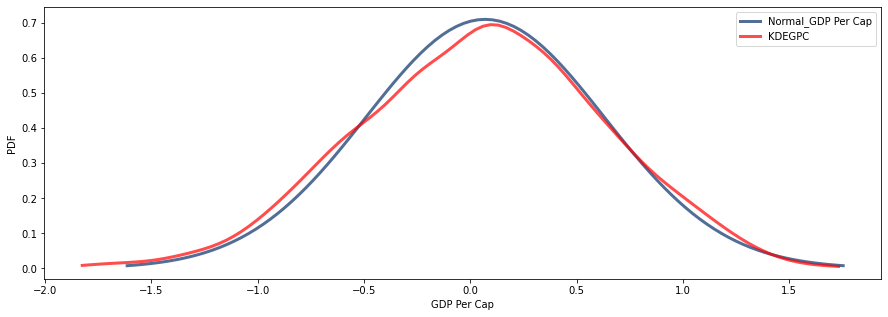

In [64]:
##

#Normal PDF plot for GDP Per Capita distribution.
thinkplot.Pdf(pdfGPC, label="Normal_GDP Per Cap")
thinkplot.Config(xlabel="GDP Per Cap", ylabel='PDF', color ="blue")

#Kernel density Estimate plot
#using the mean and std from the normal plot, - Generate random numbers for KDE plot
kdeGPC = [random.gauss(meanGPC, stdGPC) for i in range(2000)]
kdeGPC_pdf = thinkstats2.EstimatedPdf(kdeGPC)
thinkplot.Pdf(kdeGPC_pdf, label="KDEGPC", color = "red")
thinkplot.Config()

<h2>Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)</h2>
<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 

<b>CORRELATION 1 - Between LIFE EXPECTANCY & SCHOOLING</b>
<ul>
<b> SEPERATING DEVELOPED & UN-DEVELOPED COUNTRIES<b> 
<li> FOR DEVELOPED COUNTRIES - There's LOW CORRELATION between LIFE EXPECTANCY AND SCHOOLING
<li> FOR UN-DEVELOPED COUNTRIES - There's a HIGH CORRELATION between LIFE EXPECTANCY AND SCHOOLING
<ul>
<b>(PEARSON CORRELATION USED) - CODE & GRAPH BELOW<b>


In [146]:
##
#making a data frame for life expectancy and schooling for developed countries
dfD = dfLE[["isDeveloped", "Lifeexpectancy", "Schooling", "AdultMortality", "BMI"]]
dfD = dfD[(dfD["isDeveloped"]==1)]

#making a data frame for life expectancy and schooling for un developed countries
dfU = dfLE[["isDeveloped", "Lifeexpectancy", "Schooling", "AdultMortality", "BMI"]]
dfU = dfU[(dfU["isDeveloped"]==0)]

In [147]:
##
# No very obvious outliers noticed. Figures rounded off to zero just to keep plot between integers on both sides
#For developed Countries
dfD["Lifeexpectancy"] = round(dfD["Lifeexpectancy"], 0)
dfD["Schooling"] = round(dfD["Schooling"], 0)
correlation = dfD["Lifeexpectancy"].corr(dfD["Schooling"])
print(correlation)

#For un developed countries
dfU["Lifeexpectancy"] = round(dfU["Lifeexpectancy"], 0)
dfU["Schooling"] = round(dfU["Schooling"], 0)
correlation = dfU["Lifeexpectancy"].corr(dfU["Schooling"])
print(correlation)

0.39962955583553106
0.7358600484146629


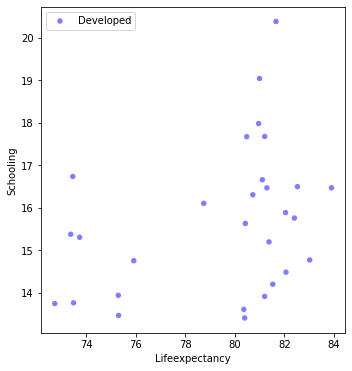

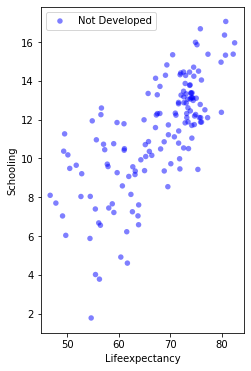

<Figure size 576x432 with 0 Axes>

In [148]:
#scatter plot visualization
thinkplot.preplot(2, rows = 1, cols = 2)
thinkplot.Scatter(thinkstats2.Jitter(dfD["Lifeexpectancy"]), thinkstats2.Jitter(dfD["Schooling"]), label="Developed", alpha = 0.5)
thinkplot.Show(xlabel="Lifeexpectancy", ylabel="Schooling")
thinkplot.subplot(2)
thinkplot.Scatter(thinkstats2.Jitter(dfU["Lifeexpectancy"]), thinkstats2.Jitter(dfU["Schooling"]), label="Not Developed", alpha = 0.5)
thinkplot.Show(xlabel="Lifeexpectancy", ylabel="Schooling") 

<b>CORRELATION 2 - Between DIPHTHERIA & POLIO</b>
<ul>
<b> SEPERATING DEVELOPED & UN-DEVELOPED COUNTRIES<b> 
<li> FOR DEVELOPED COUNTRIES - There is MODERATE CORRELATION between DIPTHTHERIA & POLIO
<li> FOR UN-DEVELOPED COUNTRIES - There is a HIGH CORRELATION between DIPTHTHERIA & POLIO
<ul>
<b>(PEARSON CORRELATION USED) - CODE & GRAPH BELOW<b>

In [134]:
##
#making a data frame for Diphtheria and Polio for developed countries
dfD1 = dfLE[["isDeveloped", "Diphtheria", "Polio"]]
dfD1 = dfD1[(dfD1["isDeveloped"]==1)]

#making a data frame for Diphtheria and Polio for un developed countries
dfU1 = dfLE[["isDeveloped", "Diphtheria", "Polio"]]
dfU1 = dfU1[(dfU1["isDeveloped"]==0)]


In [135]:
##
# outliers noticed in the plot for developed countries, but they were not extreme and hence not filtered out
# Figures rounded off to zero just to keep plot between integers on both sides
#For developed Countries
dfD1["Diphtheria"] = round(dfD1["Diphtheria"], 0)
dfD1["Polio"] = round(dfD1["Polio"], 0)
correlation = dfD1["Diphtheria"].corr(dfD1["Polio"])
print(correlation)

#For un developed countries
dfU1["Diphtheria"] = round(dfU1["Diphtheria"], 0)
dfU1["Polio"] = round(dfU1["Polio"], 0)
correlation = dfU1["Diphtheria"].corr(dfU1["Polio"])
print(correlation)

0.6656903343852204
0.9471106201279487


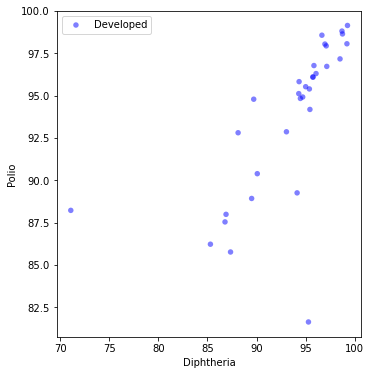

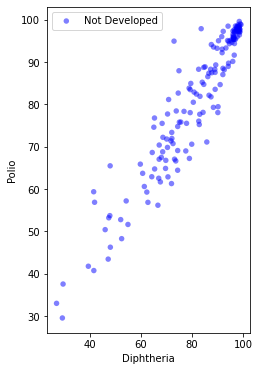

<Figure size 576x432 with 0 Axes>

In [136]:
##
# scatter plot visualization
thinkplot.preplot(2, rows = 1, cols = 2)
thinkplot.Scatter(thinkstats2.Jitter(dfD1["Diphtheria"]), thinkstats2.Jitter(dfD1["Polio"]), label="Developed", alpha = 0.5)
thinkplot.Show(xlabel="Diphtheria", ylabel="Polio")
thinkplot.subplot(2)
thinkplot.Scatter(thinkstats2.Jitter(dfU1["Diphtheria"]), thinkstats2.Jitter(dfU1["Polio"]), label="Not Developed", alpha = 0.5)
thinkplot.Show(xlabel="Diphtheria", ylabel="Polio") 

<b>CORRELATION 3 - Between INFANT DEATHS & UNDER-FIVE DEATHS</b>
<ul>
<b>SEPERATING DEVELOPED & UN-DEVELOPED COUNTRIES<b> 
<li>FOR DEVELOPED COUNTRIES - There is a HIGH CORRELATION between INFANT DEATHS & UNDER-FIVE DEATHS 
<li>FOR UN-DEVELOPED COUNTRIES - There is a HIGH CORRELATION between INFANT DEATHS & UNDER-FIVE DEATHS
<ul>
<li>In both case, outliers outliers were filterd and this was just because they were so much out of line. For instance, 
<li>the un-developed countries had all the data points below 500 with just one point at about 1,800. For the developed
<li>countries, all points were below 5 with one point around 30.
<ul>
<b>(PEARSON CORRELATION USED) - CODE & GRAPH BELOW<b>

In [137]:
##
#making a data frame for Infant deaths & under-five deaths for developed countries
dfD2 = dfLE[["isDeveloped", "infantdeaths", "under-fivedeaths"]]
dfD2 = dfD2[(dfD2["isDeveloped"]==1)]

# Filtering the out liers
dfD2 = dfD2[(dfD2["infantdeaths"]<=10)]
dfD2 = dfD2[(dfD2["under-fivedeaths"]<=10)]

#making a data frame for Infant deaths & under-five deaths for un developed countries
dfU2 = dfLE[["isDeveloped", "infantdeaths", "under-fivedeaths"]]
dfU2 = dfU2[(dfU2["isDeveloped"]==0)]

#filtering the out liers
dfU2 = dfU2[(dfU2["infantdeaths"]<=500)]
dfU2 = dfU2[(dfU2["under-fivedeaths"]<=500)]

In [138]:
##

# Figures rounded off to zero just to keep plot between integers on both sides
#For developed Countries
dfD2["infantdeaths"] = round(dfD2["infantdeaths"], 0)
dfD2["under-fivedeaths"] = round(dfD2["under-fivedeaths"], 0)
correlation = dfD2["infantdeaths"].corr(dfD2["under-fivedeaths"])
print(correlation)

#For un developed countries
dfU2["infantdeaths"] = round(dfU2["infantdeaths"], 0)
dfU2["under-fivedeaths"] = round(dfU2["under-fivedeaths"], 0)
correlation = dfU2["infantdeaths"].corr(dfU2["under-fivedeaths"])
print(correlation)

0.9693185378254855
0.992971129323876


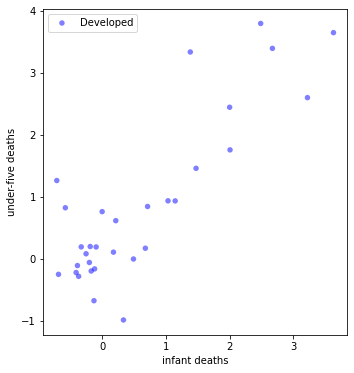

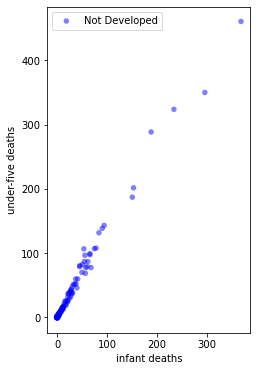

<Figure size 576x432 with 0 Axes>

In [139]:
##
# scatter plot visualization
thinkplot.preplot(2, rows = 1, cols = 2)
thinkplot.Scatter(thinkstats2.Jitter(dfD2["infantdeaths"]), thinkstats2.Jitter(dfD2["under-fivedeaths"]), label="Developed", alpha = 0.5)
thinkplot.Show(xlabel="infant deaths", ylabel="under-five deaths")
thinkplot.subplot(2)
thinkplot.Scatter(thinkstats2.Jitter(dfU2["infantdeaths"]), thinkstats2.Jitter(dfU2["under-fivedeaths"]), label="Not Developed", alpha = 0.5)
thinkplot.Show(xlabel="infant deaths", ylabel="under-five deaths") 

<h2>Part 5: Calculate correlations (25pts)</h2>
<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

<b> STRONG CORRELATION 1 - Between LIFE EXPECTANCY AND SCHOOLING</b>
<ul>
<b>SEPERATING DEVELOPED & UN-DEVELOPED COUNTRIES<b> 
<li> FOR DEVELOPED COUNTRIES - There's a LOW CORRELATION between LIFE EXPECTANCY AND SCHOOLING
<li> FOR UN-DEVELOPED COUNTRIES - There's a HIGH CORRELATION between LIFE EXPECTANCY AND SCHOOLING
<ul>
<li>In my opinion, this is kind of like reality. Because the more people are educated, they have the opportunity to
<li> learn about right choices concerning health, nutrition, exercise etc, which they most of the time live by'.
<ul>
<li>This is one case, where there is a substaintially DIFFERENT RELATIONSHIP between the developing and developed countries
<ul>
<b>(SPEARMAN CORRELATION USED) - CODE & GRAPH BELOW<b>

In [154]:
##
#calculating correlation 

# No very obvious outliers noticed. Figures rounded off to zero just to keep plot between integers on both sides
#For developed Countries
dfD["Lifeexpectancy"] = round(dfD["Lifeexpectancy"], 0)
dfD["Schooling"] = round(dfD["Schooling"], 0)
correlation = dfD["Lifeexpectancy"].corr(dfD["Schooling"])
print(correlation)

#For un developed countries
dfU["Lifeexpectancy"] = round(dfU["Lifeexpectancy"], 0)
dfU["Schooling"] = round(dfU["Schooling"], 0)
correlation = dfU["Lifeexpectancy"].corr(dfU["Schooling"])
print(correlation)

0.39962955583553106
0.7358600484146629


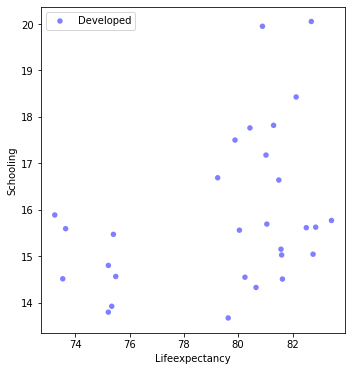

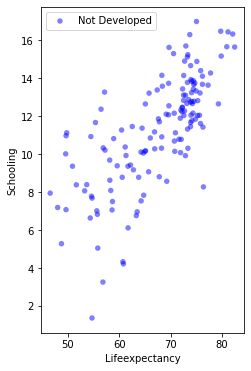

<Figure size 576x432 with 0 Axes>

In [155]:
#scatter plot visualization
thinkplot.preplot(2, rows = 1, cols = 2)
thinkplot.Scatter(thinkstats2.Jitter(dfD["Lifeexpectancy"]), thinkstats2.Jitter(dfD["Schooling"]), label="Developed", alpha = 0.5)
thinkplot.Show(xlabel="Lifeexpectancy", ylabel="Schooling")
thinkplot.subplot(2)
thinkplot.Scatter(thinkstats2.Jitter(dfU["Lifeexpectancy"]), thinkstats2.Jitter(dfU["Schooling"]), label="Not Developed", alpha = 0.5)
thinkplot.Show(xlabel="Lifeexpectancy", ylabel="Schooling") 

<b>STRONG CORRELATION 2 - Between LIFE EXPECTANCY AND ADULT MORTALITY</b>
<ul>
<b>SEPERATING DEVELOPED & UN-DEVELOPED COUNTRIES<b> 
<li> FOR DEVELOPED COUNTRIES - There's a HIGH NEGATIVE CORRELATION between LIFE EXPECTANCY AND ADULT MORTALITY
<li> FOR UN-DEVELOPED COUNTRIES - There's a HIGH NEGATIVE CORRELATION between LIFE EXPECTANCY AND ADULT MORTALITY
<li>
<li> I cannot say how similar to reality this is, without checking out some other data. I can however say that it makes sense <li> in that as people are expected to live longer (life expextancy high) the rate of people dying goes down (i.e aldult 
<li> mortality is low.) This represents a perfect negative correlation.
<ul>
<ul>
<b>(SPEARMAN CORRELATION USED) - CODE & GRAPH BELOW<b>

In [156]:
##
# No very obvious outliers noticed. Figures rounded off to zero just to keep plot between integers on both sides
#For developed Countries
dfD["Lifeexpectancy"] = round(dfD["Lifeexpectancy"], 0)
dfD["AdultMortality"] = round(dfD["AdultMortality"], 0)
correlation = dfD["Lifeexpectancy"].corr(dfD["AdultMortality"])
print(correlation)

#For un developed countries
dfU["Lifeexpectancy"] = round(dfU["Lifeexpectancy"], 0)
dfU["AdultMortality"] = round(dfU["AdultMortality"], 0)
correlation = dfU["Lifeexpectancy"].corr(dfU["AdultMortality"])
print(correlation)

-0.8780680669288876
-0.8743905345639487


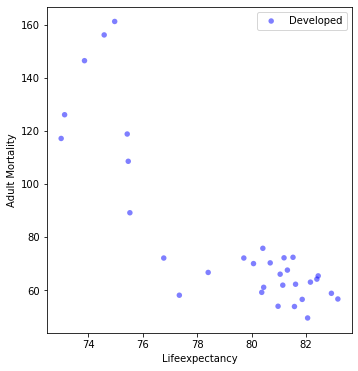

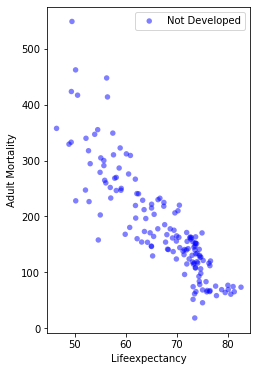

<Figure size 576x432 with 0 Axes>

In [157]:
#scatter plot visualization
thinkplot.preplot(2, rows = 1, cols = 2)
thinkplot.Scatter(thinkstats2.Jitter(dfD["Lifeexpectancy"]), thinkstats2.Jitter(dfD["AdultMortality"]), label="Developed", alpha = 0.5)
thinkplot.Show(xlabel="Lifeexpectancy", ylabel="Adult Mortality")
thinkplot.subplot(2)
thinkplot.Scatter(thinkstats2.Jitter(dfU["Lifeexpectancy"]), thinkstats2.Jitter(dfU["AdultMortality"]), label="Not Developed", alpha = 0.5)
thinkplot.Show(xlabel="Lifeexpectancy", ylabel="Adult Mortality") 

<b>STRONG CORRELATION 3 - Between LIFE EXPECTANCY AND BMI</b>
<ul>
<b>SEPERATING DEVELOPED & UN-DEVELOPED COUNTRIES<b> 
<li> FOR DEVELOPED COUNTRIES - There's a LOW NEGATIVE CORRELATION between LIFE EXPECTANCY AND BMI
<li> FOR UN-DEVELOPED COUNTRIES - There's a MODERATE CORRELATION between LIFE EXPECTANCY AND BMI
<ul>
<li> In my opinion, this kind of mirrows the reality in the case of developed countries. beause we know that higher BMI can <li> mean health issues around the corner, which may reduce life expectancy. For the un developed countries, there is a 
<li> modeerate positive correlation which means as BMI goes up, life expectancy also goes up. This may not be exactly correct.
<ul>
<li> This is another case where there is a DIFFERENT RELATIONSHIP between the developing and developed countries
<ul>
<b>(SPEARMAN CORRELATION USED) - CODE & GRAPH BELOW<b>

In [152]:
##
# No very obvious outliers noticed. Figures rounded off to zero just to keep plot between integers on both sides
#For developed Countries
dfD["Lifeexpectancy"] = round(dfD["Lifeexpectancy"], 0)
dfD["BMI"] = round(dfD["BMI"], 0)
correlation = dfD["Lifeexpectancy"].corr(dfD["BMI"])
print(correlation)

#For un developed countries
dfU["Lifeexpectancy"] = round(dfU["Lifeexpectancy"], 0)
dfU["BMI"] = round(dfU["BMI"], 0)
correlation = dfU["Lifeexpectancy"].corr(dfU["BMI"])
print(correlation)

-0.17216264712675516
0.695729095325626


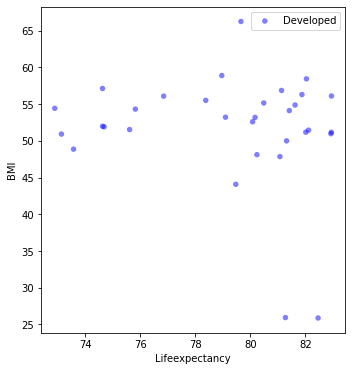

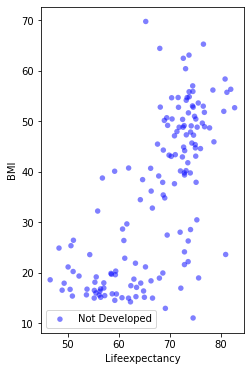

<Figure size 576x432 with 0 Axes>

In [153]:
#scatter plot visualization
thinkplot.preplot(2, rows = 1, cols = 2)
thinkplot.Scatter(thinkstats2.Jitter(dfD["Lifeexpectancy"]), thinkstats2.Jitter(dfD["BMI"]), label="Developed", alpha = 0.5)
thinkplot.Show(xlabel="Lifeexpectancy", ylabel="BMI")
thinkplot.subplot(2)
thinkplot.Scatter(thinkstats2.Jitter(dfU["Lifeexpectancy"]), thinkstats2.Jitter(dfU["BMI"]), label="Not Developed", alpha = 0.5)
thinkplot.Show(xlabel="Lifeexpectancy", ylabel="BMI") 